In [42]:
! pip3 install openpyxl pandas matplotlib seaborn numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import seaborn as sns
sns.set_theme()


# OpenSSL Benchmarking Reports
### Bench Configurations
We have benchmarked the following Compute Optimized Azure VMs using **OpenSSL 1.0.2k-fips**:
 - **F16s_v2**: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
 - **F32s_v2**: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
 - **F48s_v2**: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz
 - **F64s_v2**: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
 
For detailed info on machine arch refer to report files or https://learn.microsoft.com/en-us/azure/virtual-machines/fsv2-series. 

## Code for parsing & plotting

### Initialization Values

In [2]:
columns = [['Algorithm', '16B', '64B', '256B','1024B', '8192B'],
           ['Algorithm', 'Sign', 'Verify', 'Sign Rate', 'Verify Rate']]
regex_list = [r"^(\S+\s*\S+)\s+(\d+\.\d+)k\s+(\d+\.\d+)k\s+(\d+\.\d+)k\s+(\d+\.\d+)k\s+(\d+\.\d+)k.*$",
              r"^(.*)\s+(\d+\.\d+)s\s+(\d+\.\d+)s\s+(\d+\.\d+)\s+(\d+\.\d+).*$"]
vm = {
    'f48.txt':'F48sv2',
    'f64.txt':'F64sv2',
    'f16.txt':'F16sv2',
    'f32.txt':'F32sv2'
}
df_by_vm = {
    'F64sv2':{},
    'F48sv2':{},
    'F32sv2':{},
    'F16sv2':{}
}

### Dataframe by File Parsing 

In [3]:
def get_df(filename, regex, columns, is_enc):
    output = open(filename, "r").read()
    matches = re.findall(regex, output, re.MULTILINE)
    df = pd.DataFrame(matches, columns=columns)
    if is_enc==0:
        df[columns[1:]] = (df[columns[1:]].astype(float)*1000/pow(2, 30))
    else:
        df[columns[1:]] = (df[columns[1:]].astype(float))
        df[columns[0]]= df[columns[0]].str.strip()
    df = df.dropna()[columns]
    df_by_vm[vm[filename]][is_enc]=df
    return df

In [4]:
dfs=[]
for filename, vm_name in vm.items():
    for i in range(len(regex_list)):
        df = get_df(filename, regex_list[i], columns[i],i)
        dfs.append(df)

In [5]:
dfs[0].head(50)

,Algorithm,16B,64B,256B,1024B,8192B
0,md2,0.003129,0.006369,0.008537,0.009447,0.009687
1,md4,0.088672,0.267040,0.618644,0.925659,1.062711
2,md5,0.064346,0.185936,0.400034,0.562849,0.648127
3,hmac(md5),0.052659,0.160094,0.366562,0.548038,0.630613
4,sha1,0.075936,0.220907,0.510344,0.770711,0.900429
5,rmd160,0.042133,0.101315,0.182006,0.230427,0.242778
6,rc4,0.619633,0.650601,0.545359,0.517333,0.498189
7,des cbc,0.071575,0.073745,0.074051,0.074350,0.073329
8,des ede3,0.027640,0.027557,0.028330,0.028542,0.028069
9,idea cbc,0.086304,0.089621,0.090901,0.090699,0.091456


In [6]:
enc=0
df_aes128 = dfs[enc].loc[dfs[enc]['Algorithm'].isin(['aes-128-gcm','aes-128-cbc','aes-128 cbc'])]
df_aes128.head()

df_aes192 = dfs[enc].loc[dfs[enc]['Algorithm'].isin(['aes-192-gcm','aes-192-cbc','aes-192 cbc'])]
df_aes192.head()

df_aes256 = dfs[enc].loc[dfs[enc]['Algorithm'].isin(['aes-256-gcm','aes-256-cbc','aes-256 cbc'])]
df_aes256.head()

df_md = dfs[enc].loc[dfs[enc]['Algorithm'].isin(['md5','sha1','sha256', 'sha512'])]
df_md.head()

aes_list = {128:df_aes128, 192:df_aes192, 256:df_aes256} 

In [7]:
sign=1
df_rsa = dfs[sign].loc[dfs[sign]['Algorithm'].isin(['rsa  512 bits','rsa 1024 bits','rsa 2048 bits','rsa 4096 bits'])]
df_rsa.head()

df_ecdsa = dfs[sign].loc[dfs[sign]['Algorithm'].isin(['256 bit ecdsa (nistp256)','384 bit ecdsa (nistp384)','521 bit ecdsa (nistp521)'])]
df_ecdsa.head()

df_dsa = dfs[sign].loc[dfs[sign]['Algorithm'].isin(['dsa  512 bits','dsa 1024 bits','dsa 2048 bits'])]
df_dsa.head()

sign_list = {'RSA':df_rsa, 'ECDSA': df_ecdsa, 'DSA':df_dsa} 

### Plot functions

#### AES & MD Plot functions

In [8]:
def get_plottable_df(df, enc):
    x=dict([(df[columns[enc][0]].iloc[i], list(df[columns[enc][1:]].iloc[i])) for i in range(len(df))])
    return x

In [9]:
sns.set_style("whitegrid")
sns.set_context("paper")
block_size =  ['16B', '64B', '256B', '1024B', '8192B']
def plot_graph(df, enc, x_labels, title):
    aes = get_plottable_df(df, enc)
    x = np.arange(len(x_labels))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in aes.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=0.1, fmt='%.1f')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('GB per second')
    ax.set_title(title)
    ax.set_xticks(x + width, block_size)
    ax.legend(loc='upper left', ncols=3)
    # ax.set_ylim(0, 10)

    
def plot_all_enc_md(filename):
    for keysize, aes_df in aes_list.items():
        plot_graph(aes_df, enc, block_size, f'{vm[filename]}: AES-{keysize} processing speed by Block Size')

    plot_graph(df_md, enc, block_size, f'{vm[filename]}: Message Digest processing speed by Block Size')
    plt.show()

#### Signature Algorithm Plot functions

In [10]:
# fig, ax = plt.subplots(layout='constrained')
# plt.bar(df['Algorithm'].to_list(),df['Verify Rate', 'Sign Rate'].to_list())
def plot_sign_graph(df, prefix):
    # Data
    algorithm = df['Algorithm'].to_list()
    sign_rate = df['Sign Rate'].to_list()
    verify_rate = df['Verify Rate'].to_list()

    # Create an array of indexes for each algorithm
    x_indexes = np.arange(len(algorithm))

    # Set the width of the bars
    bar_width = 0.35

    # Create the figure and axis objects
    fig, ax = plt.subplots(layout='constrained')

    # Plot the bars for sign rate and verify rate
    s=ax.bar(x_indexes - bar_width/2, sign_rate, bar_width, label='Sign Rate')
    v=ax.bar(x_indexes + bar_width/2, verify_rate, bar_width, label='Verify Rate')
    ax.bar_label(s, padding=0.2,fmt='%.f')
    ax.bar_label(v, padding=0.2,fmt='%.f')
    # Set the x-ticks and labels
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(algorithm)
    ax.set_title(f'{prefix} Operations per second by Key Size')
    # Set the y-axis label
    ax.set_ylabel('Rate per second')

    
    # Add the legend
    ax.legend(ncols=2)

def plot_all_sign(filename):
    for algo, df_sign in sign_list.items():
        plot_sign_graph(df_sign, f'{vm[filename]}: {algo}')
    # Display the plot
    plt.show()


In [11]:
def plot_all(filename):
    plot_all_enc_md(filename)
    plot_all_sign(filename)

## Graph Plots & Reports

### Azure F16sv2: Encryption & Message Digest Graphical Reports

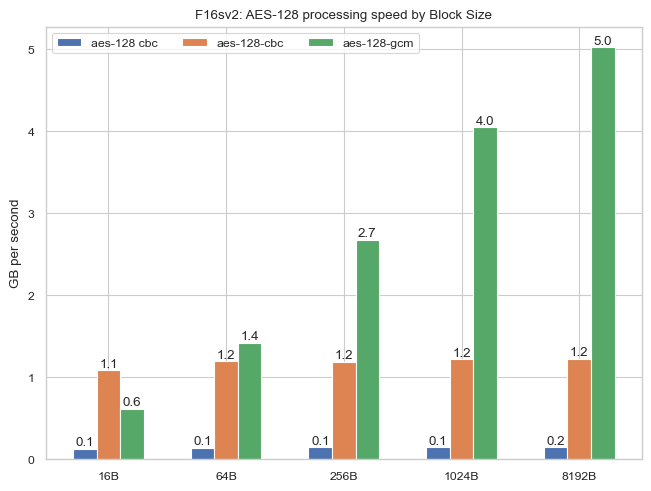

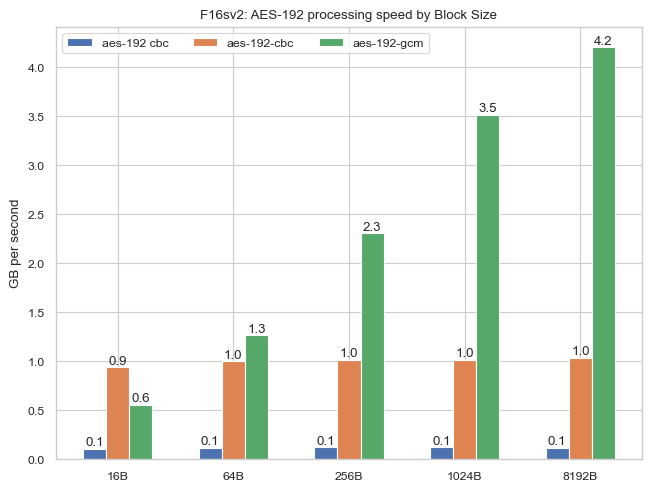

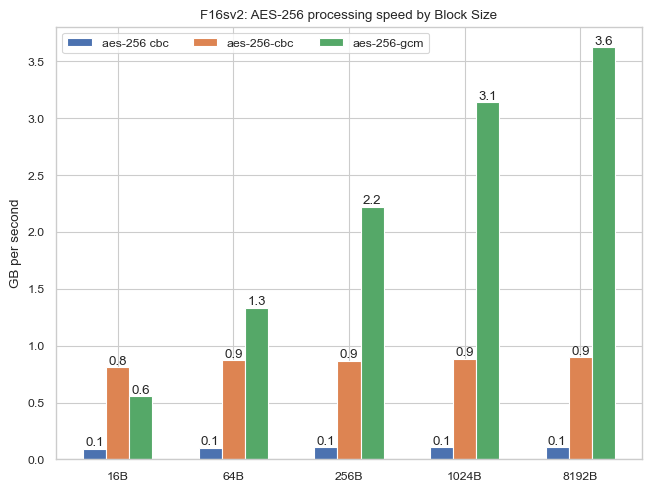

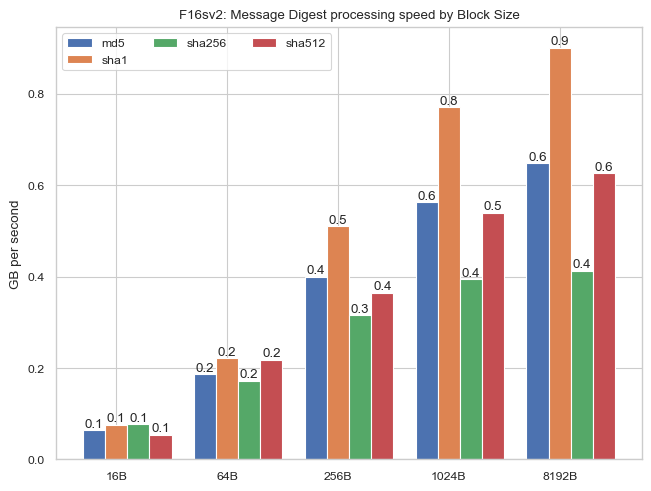

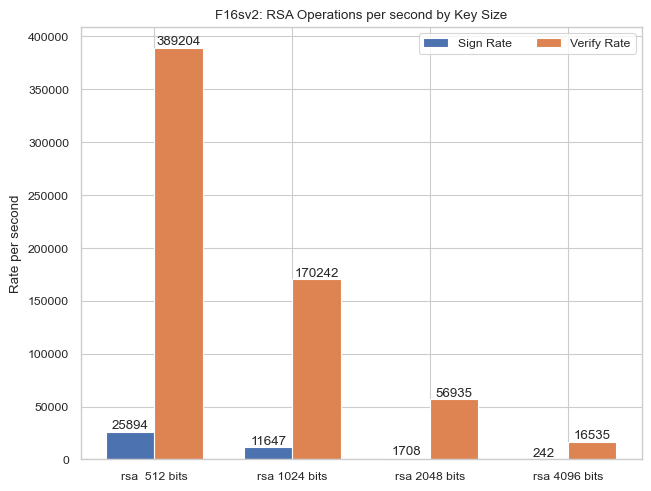

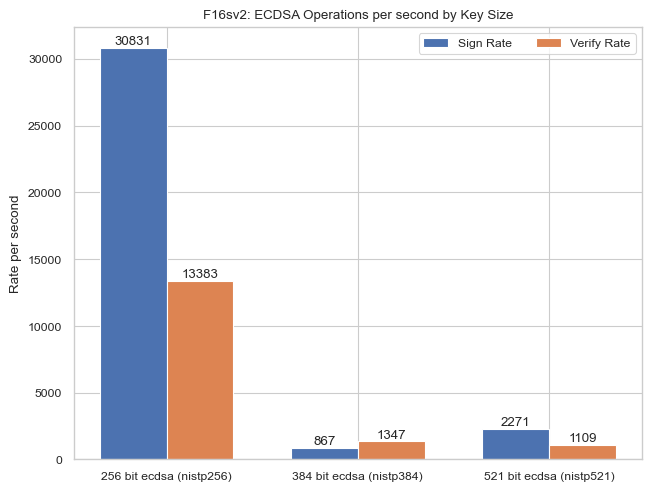

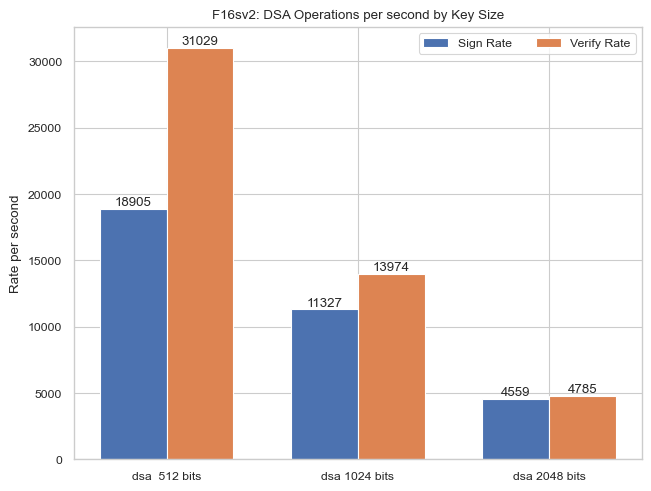

In [12]:
plot_all('f16.txt')

### Azure F32sv2: Encryption & Message Digest Graphical Reports

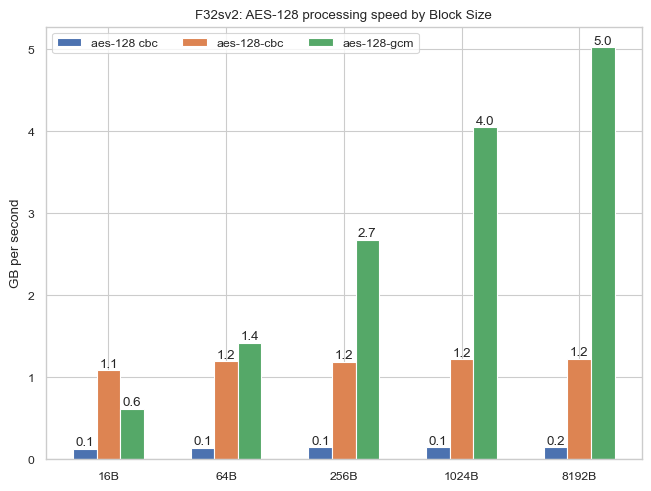

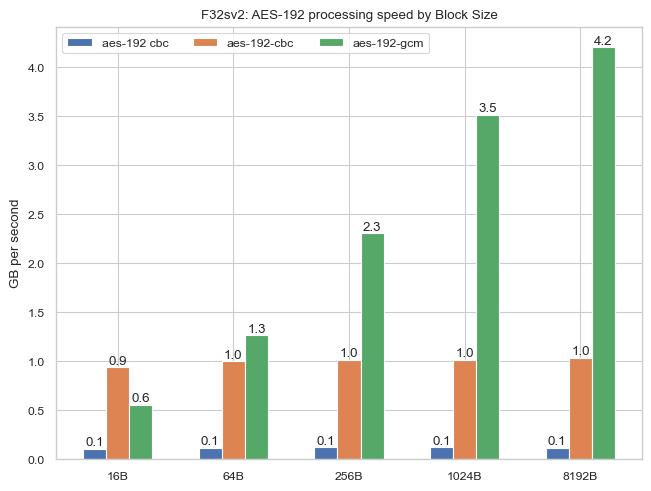

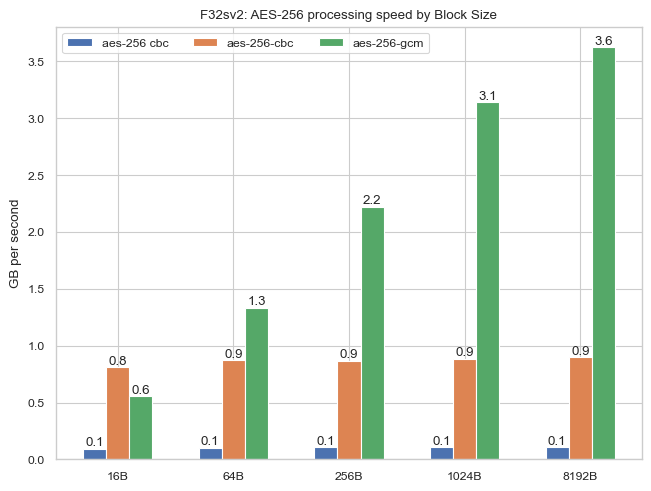

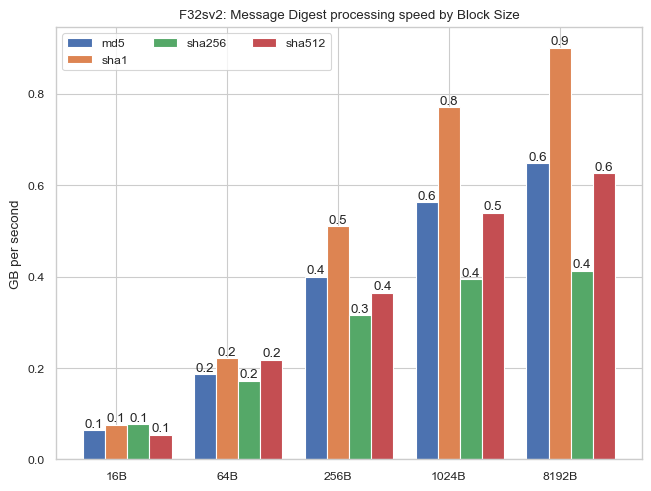

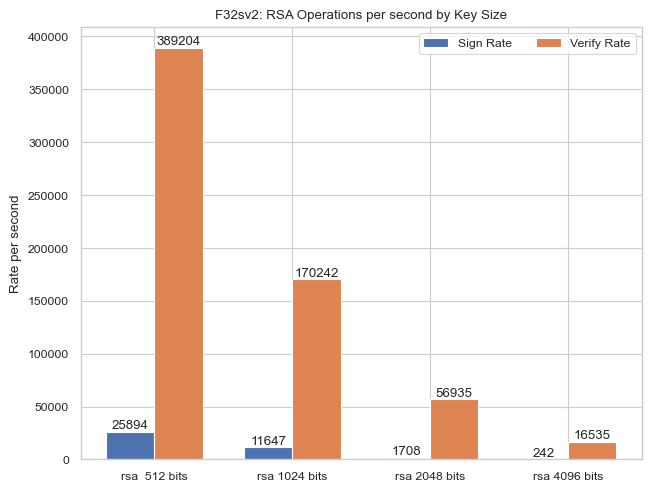

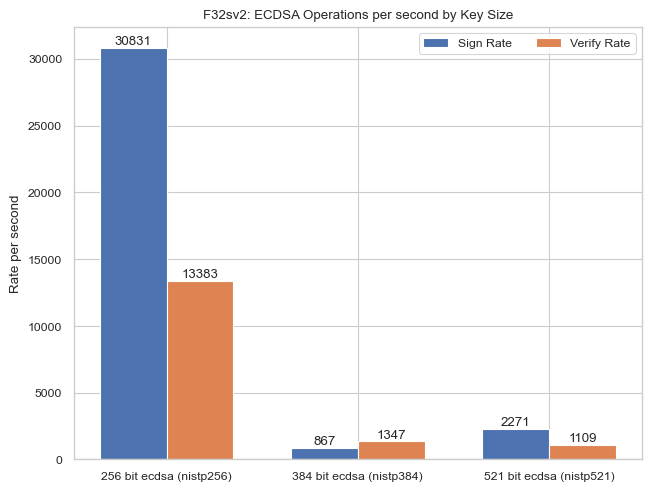

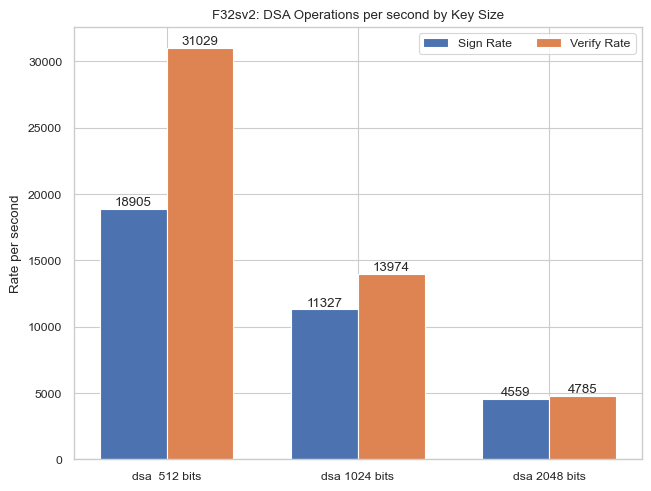

In [13]:
plot_all('f32.txt')

### Azure F48sv2: Encryption & Message Digest Graphical Reports

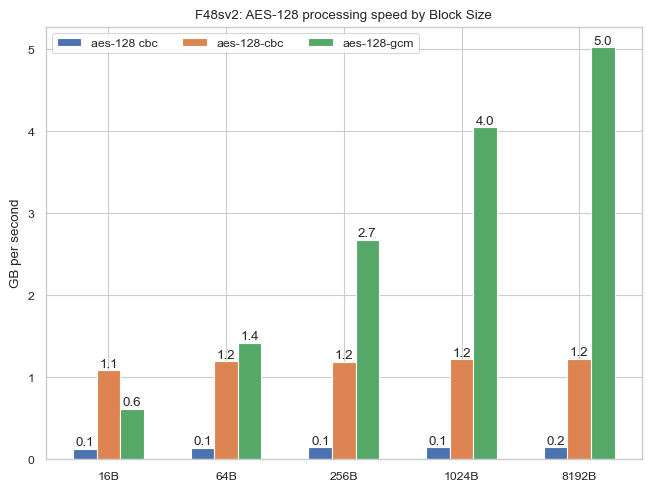

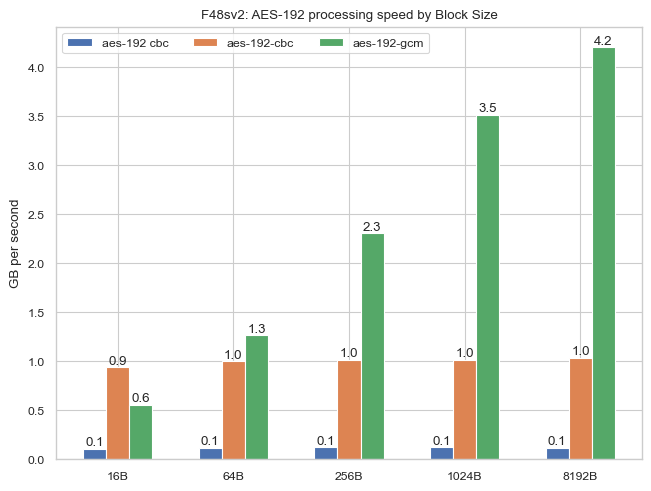

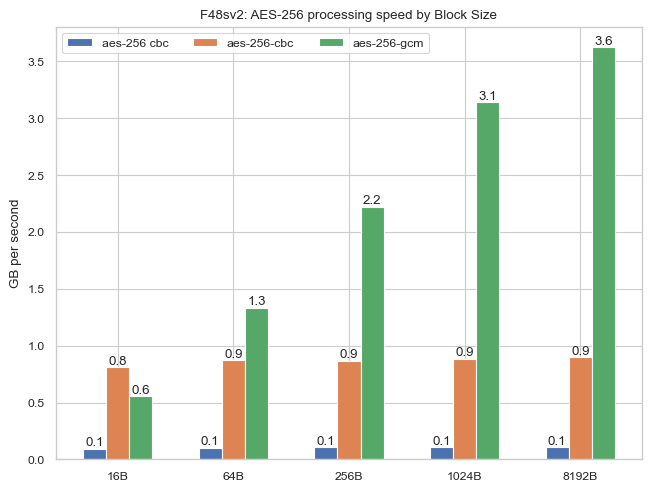

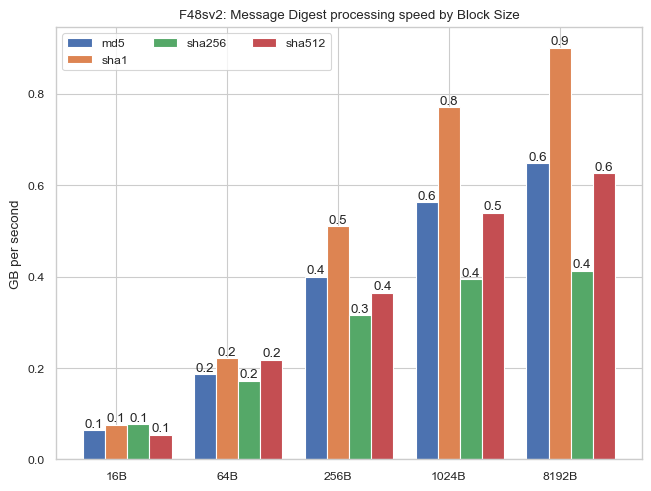

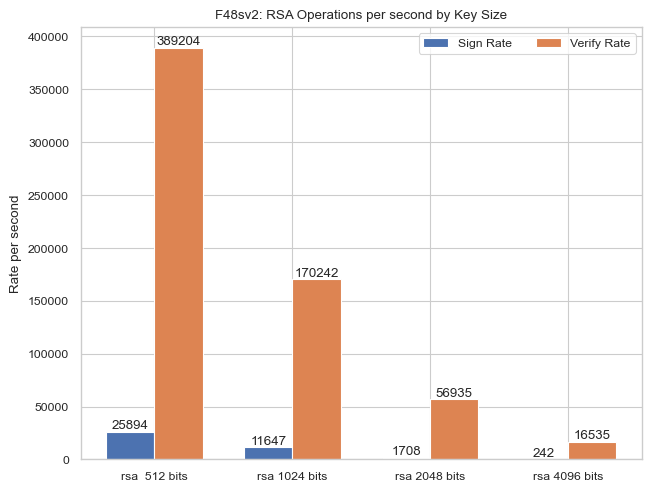

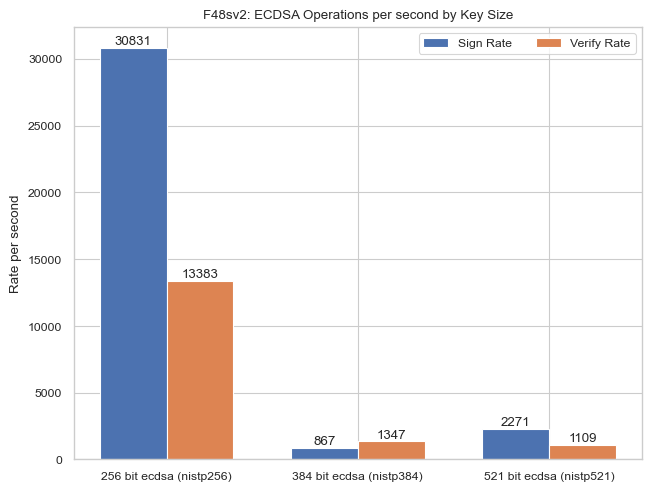

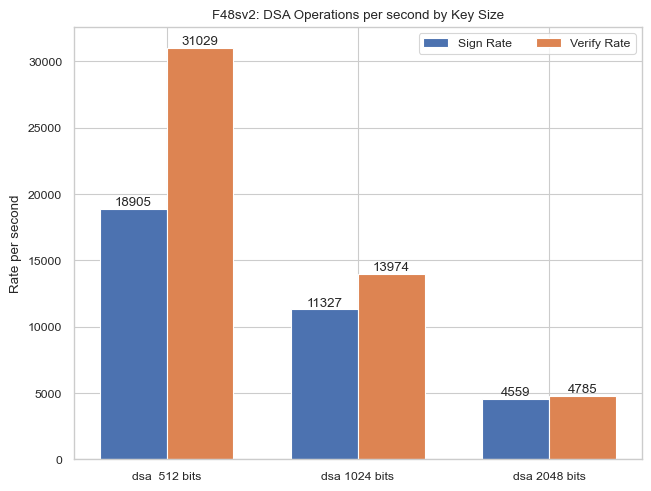

In [14]:
plot_all('f48.txt')

### Azure F64sv2: Encryption & Message Digest Graphical Reports

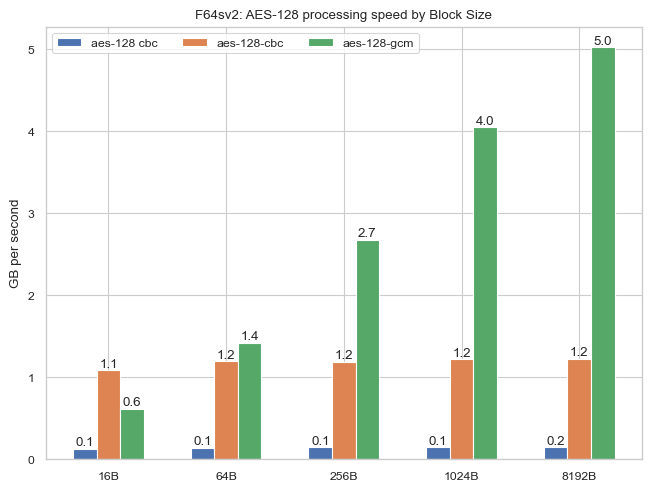

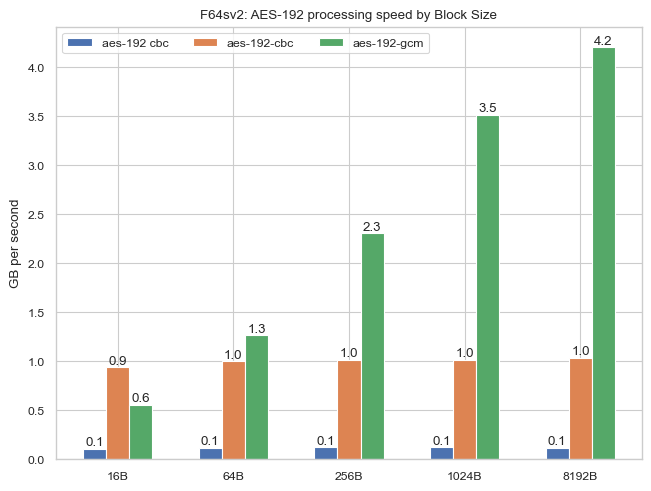

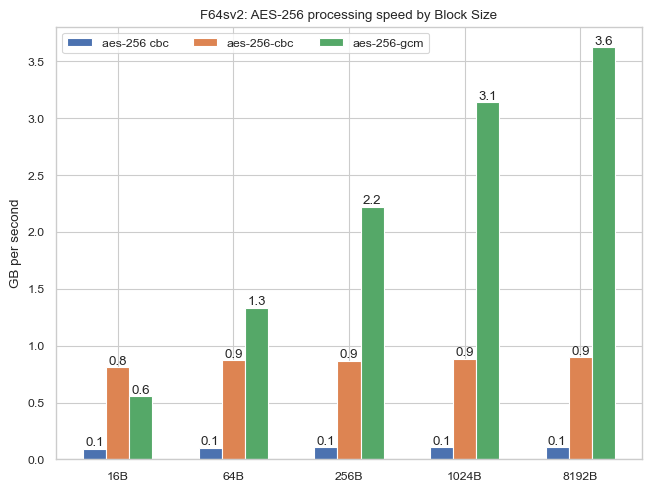

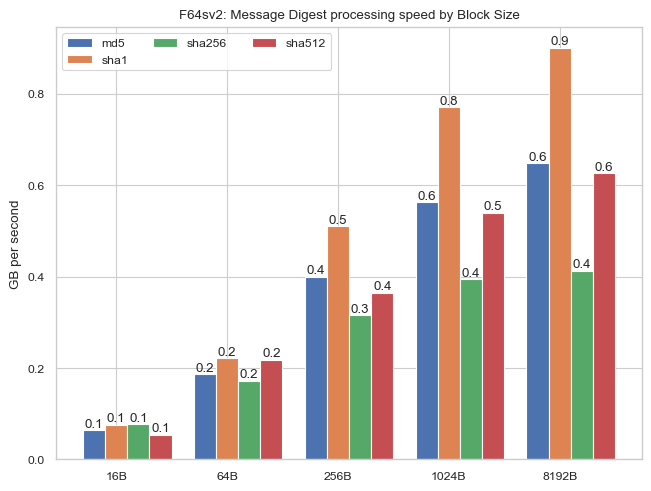

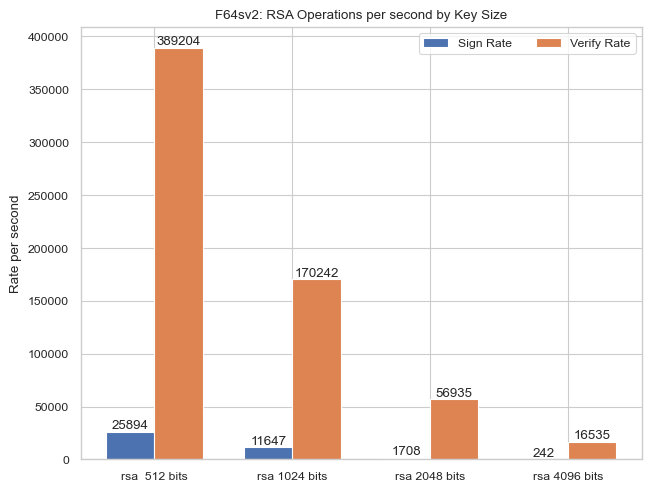

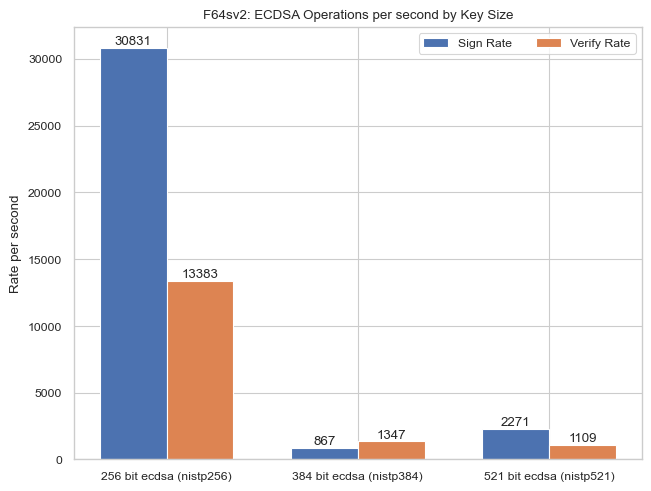

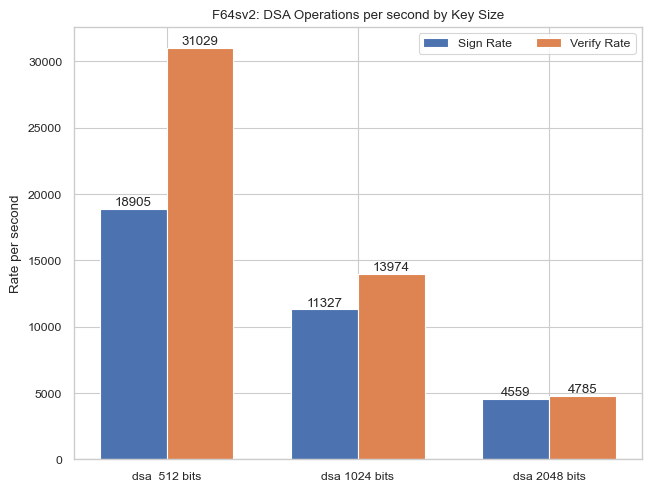

In [15]:
plot_all('f64.txt')

### Overview of OpenSSL EVP Interface, AES-NI, SHA-NI
Openssl's EVP API provides a more streamlined interface for working with cryptographic functions, reducing the risk of errors and security vulnerabilities. For example, the EVP API automatically handles padding and block size issues. Additionally, the EVP API has the ability to take advantage of optimized code paths, CPU-specific optimizations and it can be configured to use hardware acceleration, such as the AES-NI instruction set on Intel CPUs, which can further improve performance. However, the exact extent to which the EVP API uses multiple cores will depend on a variety of factors, including the specific cryptographic function being used, the size and complexity of the input data, the hardware and software environment, and other factors. Therefore, it's important to test and benchmark the performance of OpenSSL's ciphers to determine whether it is taking advantage of multiple cores effectively.

Some CPUs have specialized instructions for performing SHA512 hashing, such as the SHA extensions or SHA-NI on Intel CPUs. If the CPU supports these instructions, SHA512 may be faster than SHA256 even for smaller data sets due to hardware acceleration. We found that these VMs don't have SHA-NI but have other relevant extensions like ssse3, avx, avx2, avx512 instruction set as visible in the output of `lscpu` command in the report files. 

### Conclusion on performance of AES-CBC vs AES-CBC(EVP) vs AES-GCM(EVP) 
 - AES-CBC, AES-CBC(EVP) & AES-GCM(EVP) is shown as 'aes-128 cbc', 'aes-128-cbc' & 'aes-128-gcm' respectively for all the graphs.
 - We see that AES-CBC has the lowest performance among the three. Also the performance remains the same across different block sizes.
 - We observe that AES-CBC throught EVP interface performs almost 10x better. This is expected as EVP can exploit optimized code paths & hardware acceleration using AES-NI.
 - AES-GCM is the preferred cipher as per the Adobe standard as it has added security advantages over CBC like authentication tag. We observe it also performs the best across all machines under consideration.  
 - Performance AES-GCM & the performance gap of AES-GCM & CBC(EVP) drastically increase as the block size increases.
 
### Conclusion on performance of HMAC(MD5) vs SHA1 vs SHA256 vs SHA512 
 - SHA1 is the best performing message digest function across all block sizes, we avoid this as the Adobe standard only allows SHA1 for HMAC for certain TLS ciphers & prefers SHA2 family of functions.
 - We observe that SHA512 is faster than SHA256 for larger block sizes. SHA256 produces a 256-bit hash, while SHA512 produces a 512-bit hash. This means that SHA512 can handle larger data sets more efficiently, as it requires fewer iterations to hash the same amount of data.
 - 

### Performance Across Azure VM Type

In [16]:
df_sign=pd.DataFrame()
df_enc=pd.DataFrame()
for vm_name, algo in df_by_vm.items(): 
    df_by_vm[vm_name][sign]['vm']=vm_name    
    df_by_vm[vm_name][enc]['vm']=vm_name
    df_sign = pd.concat([df_sign,df_by_vm[vm_name][sign]])
    df_enc = pd.concat([df_enc,df_by_vm[vm_name][enc]])

y_labels = ['F64','F48','F32','F16']

#### AES-GCM Speed by VM Type

Text(52.91666666666667, 0.5, 'Azure VMs')

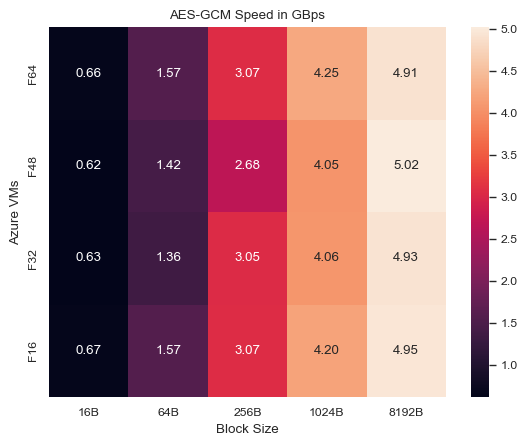

In [17]:
x_labels = ['16B','64B','256B','1024B','8192B']
df_aesgcm = df_enc.loc[df_enc['Algorithm'].isin(['aes-128-gcm'])]
ax = sns.heatmap(np.array(df_aesgcm[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('AES-GCM Speed in GBps')
ax.set_xlabel('Block Size')
ax.set_ylabel('Azure VMs')

#### SHA256 Speed by VM Type

Text(52.91666666666667, 0.5, 'Azure VMs')

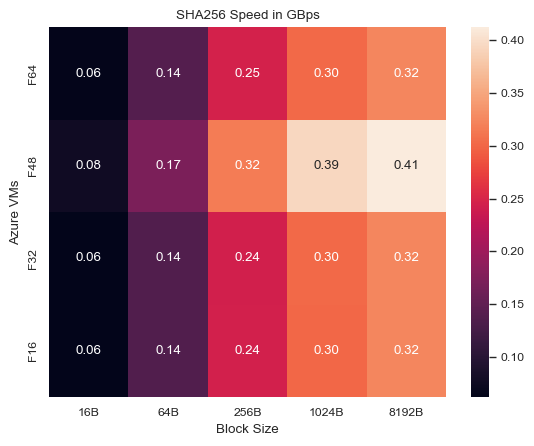

In [18]:
x_labels = ['16B','64B','256B','1024B','8192B']
df_sha = df_enc.loc[df_enc['Algorithm'].isin(['sha256'])]
ax = sns.heatmap(np.array(df_sha[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('SHA256 Speed in GBps')
ax.set_xlabel('Block Size')
ax.set_ylabel('Azure VMs')

#### ECDSA Speed by VM Type

Text(52.91666666666667, 0.5, 'Azure VMs')

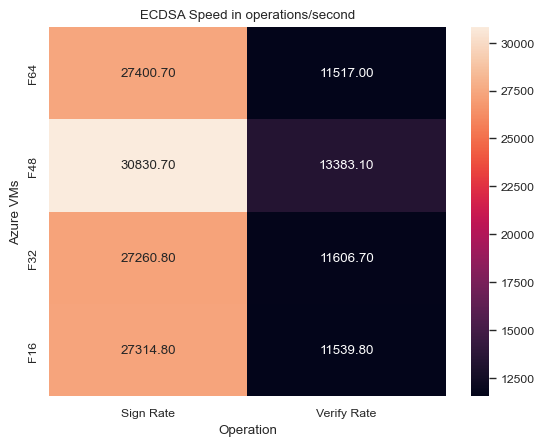

In [19]:
df_ecdsa = df_sign.loc[df_sign['Algorithm'].isin(['256 bit ecdsa (nistp256)'])]
x_labels = ['Sign Rate','Verify Rate']
ax = sns.heatmap(np.array(df_ecdsa[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('ECDSA Speed in operations/second')
ax.set_xlabel('Operation')
ax.set_ylabel('Azure VMs')

### Conclusion on performance across Azure VM Types
 - From the heatmaps, we observe that the throughput is similar across all VM types for encryption, message digest and signature algorithms. Since we didn't use the "-multi" command line argument while benchmarking which uses multiple threads, this was expected. We might see considerable differences if we run OpenSSL with multiple threads on all the VMs.  
 - For F48sv2 VM AES-GCM is a little slower than the other VMs & ECDSA is faster than the other VMs. This could be due to the difference in hardware as F48sv2 machine had "Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz" whereas other VMs had Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz.

### Performance & Key Size

#### AES-GCM Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

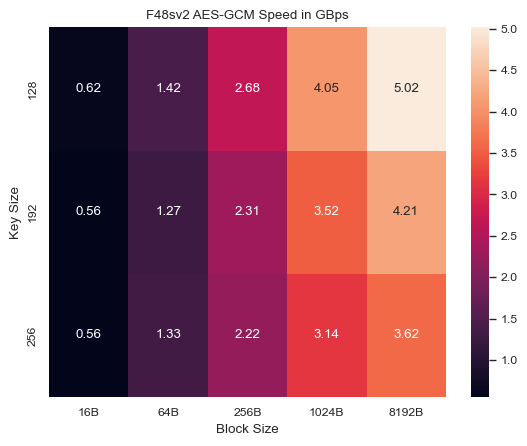

In [53]:
df_aes_gcm = df_by_vm['F48sv2'][enc].loc[df_by_vm['F48sv2'][enc]['Algorithm'].isin(['aes-128-gcm','aes-192-gcm','aes-256-gcm'])]
df_aes_gcm[['16B','64B','256B','1024B','8192B']].head()
y_labels = [128,192,256]
x_labels = ['16B','64B','256B','1024B','8192B']
ax = sns.heatmap(np.array(df_aes_gcm[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 AES-GCM Speed in GBps')
ax.set_xlabel('Block Size')
ax.set_ylabel('Key Size')

#### AES CBC Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

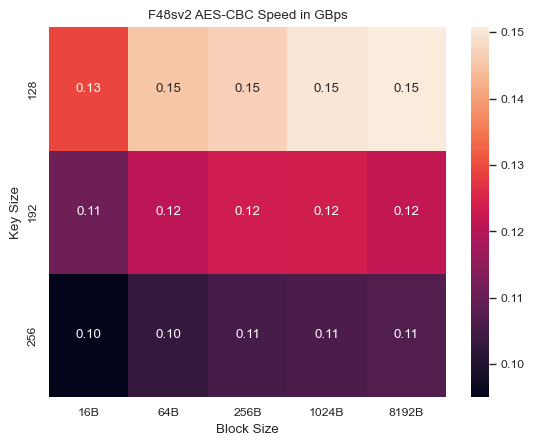

In [54]:
df_aes_cbc = df_by_vm['F48sv2'][enc].loc[df_by_vm['F48sv2'][enc]['Algorithm'].isin(['aes-128 cbc','aes-192 cbc','aes-256 cbc'])]
df_aes_cbc[['16B','64B','256B','1024B','8192B']].head()
y_labels = [128,192,256]
x_labels = ['16B','64B','256B','1024B','8192B']
ax = sns.heatmap(np.array(df_aes_cbc[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 AES-CBC Speed in GBps')
ax.set_xlabel('Block Size')
ax.set_ylabel('Key Size')

#### EVP AES-CBC Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

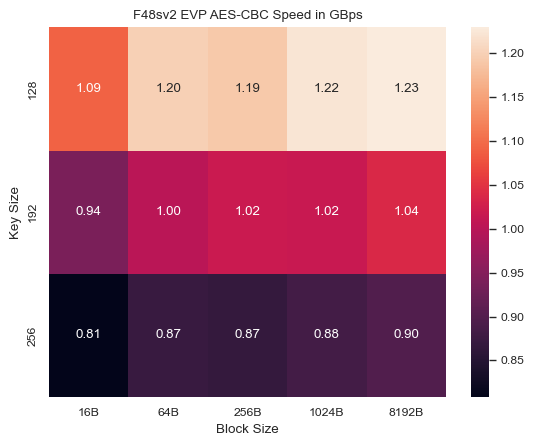

In [55]:
df_aes_cbc_evp = df_by_vm['F48sv2'][enc].loc[df_by_vm['F48sv2'][enc]['Algorithm'].isin(['aes-128-cbc','aes-192-cbc','aes-256-cbc'])]
df_aes_cbc_evp[['16B','64B','256B','1024B','8192B']].head()
y_labels = [128,192,256]
x_labels = ['16B','64B','256B','1024B','8192B']
ax = sns.heatmap(np.array(df_aes_cbc_evp[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 EVP AES-CBC Speed in GBps')
ax.set_xlabel('Block Size')
ax.set_ylabel('Key Size')

#### ECDSA Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

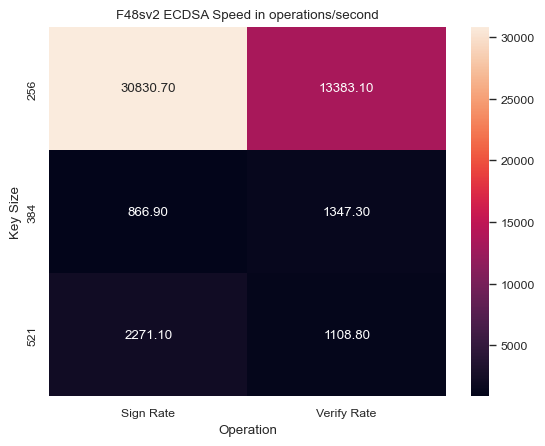

In [56]:
df_ecdsa = df_by_vm['F48sv2'][sign].loc[df_by_vm['F48sv2'][sign]['Algorithm'].isin(['256 bit ecdsa (nistp256)','384 bit ecdsa (nistp384)','521 bit ecdsa (nistp521)'])]
df_ecdsa.head()
y_labels = [256,384,521]
x_labels = ['Sign Rate','Verify Rate']
ax = sns.heatmap(np.array(df_ecdsa[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 ECDSA Speed in operations/second')
ax.set_xlabel('Operation')
ax.set_ylabel('Key Size')

#### RSA Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

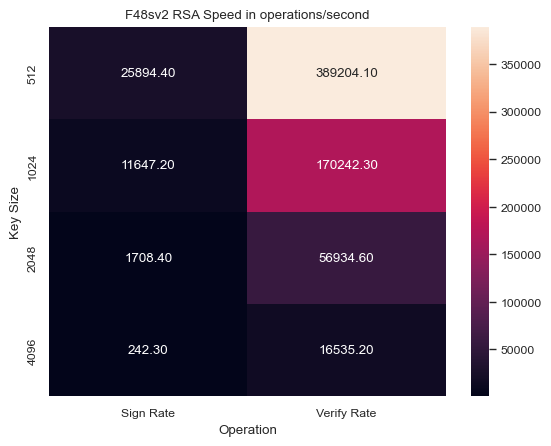

In [57]:
df_rsa = df_by_vm['F48sv2'][sign].loc[df_by_vm['F48sv2'][sign]['Algorithm'].isin(['rsa  512 bits','rsa 1024 bits','rsa 2048 bits','rsa 4096 bits'])]
df_rsa[['Sign Rate','Verify Rate']].head()
y_labels = [512,1024,2048,4096]
x_labels = ['Sign Rate','Verify Rate']
ax = sns.heatmap(np.array(df_rsa[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 RSA Speed in operations/second')
ax.set_xlabel('Operation')
ax.set_ylabel('Key Size')

#### DSA Speed by Key Size

Text(52.91666666666667, 0.5, 'Key Size')

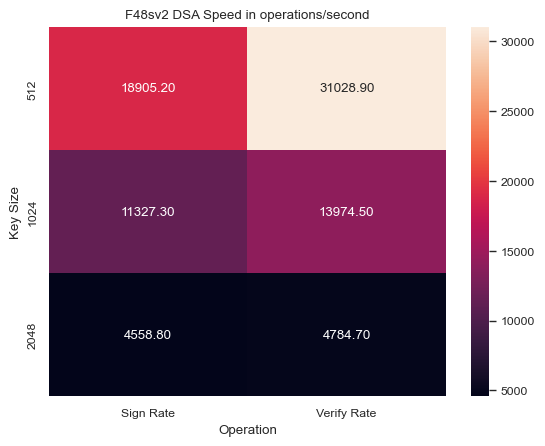

In [65]:
df_dsa = df_by_vm['F48sv2'][sign].loc[df_by_vm['F48sv2'][sign]['Algorithm'].isin(['dsa  512 bits','dsa 1024 bits','dsa 2048 bits'])]
df_dsa[['Sign Rate','Verify Rate']].head()
y_labels = [512,1024,2048]
x_labels = ['Sign Rate','Verify Rate']
ax = sns.heatmap(np.array(df_dsa[x_labels].head()),xticklabels=x_labels, yticklabels=y_labels,annot=True, fmt='.2f')
ax.set_title('F48sv2 DSA Speed in operations/second')
ax.set_xlabel('Operation')
ax.set_ylabel('Key Size')

### Conclusions On Choice of Signature Algorithms
 - RSA & DSA are faster in verify operations than signing.
 - ECDSA is faster in sign operations than verification.
 - We know that bigger the key size, more the security. From the heatmaps of ECDSA & RSA we observe that with bigger key sizes throughput decreases. 
 
#### RSA vs ECDSA vs DSA
 - As per Internal Adobe standards we can only use RSA/DSA with 2048 bits key and higher or ECDSA with 256 bits key or higher. 
 - With this restriction, RSA-2048 is worse in performance than ECDSA-256 in signing i.e. 1.7K/s vs 30K/s. 
 - ECDSA-256 is better than DSA-2048 in both signing and verification.
 - Since the primary task of a server in a TLS session is signing the certificates the server should be optimized for signing. However, both signing and verifying operations can become computationally expensive, especially in high-volume environments like ours where MTAs receive 60 Million RPS of TLS email traffic from internal upstream services and need to send TLS email traffic to ISPs. In such cases, server hardware and software should be optimized for both signing and verifying operations to ensure efficient and reliable TLS connections. Since ECDSA performs well in signing & verification, we choose to prefer ECDSA-256 over RSA/DSA-2048 for server processes.